# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_stats_salary_19-20')
qbs.head()

,NAME,COMP,ATT,ATT/G,YDS,300+ YDS,COMP%,YDS/ATT,YDS/COMP,TD,...,YDS/ATT_rank,YDS/COMP_rank,TD_rank,INT_rank,QBR_rank,LONG_rank,SACKS_rank,SACK YDS_rank,FUML_rank,salary
0,Drew Lock,100,156,31.2,1020,1,64.1,6.5,10.2,7,...,40.5,46.0,34.0,15.0,9.0,40.0,6.5,5.0,19.0,1752704
1,Patrick Mahomes,319,484,34.6,4031,7,65.9,8.3,12.6,26,...,5.0,7.5,10.0,25.0,12.0,7.5,26.0,26.0,29.0,4106447
2,Tom Brady,373,613,38.3,4057,5,60.8,6.6,10.9,24,...,37.0,32.5,13.5,38.0,13.0,30.0,33.5,35.0,19.0,23000000
3,Drew Brees,281,378,34.4,2979,5,74.3,7.9,10.6,27,...,10.5,41.0,6.0,19.0,26.0,28.0,18.5,17.5,7.5,25000000
4,Matt Ryan,408,616,41.1,4466,11,66.2,7.2,10.9,26,...,18.0,32.5,10.0,51.0,17.0,1.0,55.0,54.0,50.0,30000000


In [3]:
qbs.columns

Index(['NAME', 'COMP', 'ATT', 'ATT/G', 'YDS', '300+ YDS', 'COMP%', 'YDS/ATT',
       'YDS/COMP', 'TD', 'INT', 'QBR', 'LONG', 'SACKS', 'SACK YDS', 'FUML',
       'COMP_rank', 'ATT_rank', 'ATT/G_rank', 'YDS_rank', '300+ YDS_rank',
       'COMP%_rank', 'YDS/ATT_rank', 'YDS/COMP_rank', 'TD_rank', 'INT_rank',
       'QBR_rank', 'LONG_rank', 'SACKS_rank', 'SACK YDS_rank', 'FUML_rank',
       'salary'],
      dtype='object')

In [4]:
model = LinearRegression()

In [5]:
X = qbs[['COMP', 'ATT', 'ATT/G', 'YDS', '300+ YDS', 'COMP%', 'YDS/ATT',
         'YDS/COMP', 'TD', 'INT', 'QBR', 'LONG', 'SACKS', 'SACK YDS',
         'FUML']]
y = qbs['salary']

In [6]:
X.shape

(39, 15)

In [7]:
y.shape

(39,)

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = model.predict(X)

In [10]:
def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [11]:
np.sqrt(MSE(y, y_pred))

7173034.672622724

In [12]:
model.intercept_

151983510.255377

In [13]:
model.coef_

array([ 3.04663991e+05, -1.62599183e+05,  5.77713570e+05, -2.13248121e+01,
        5.86547703e+05, -2.69351981e+06,  2.24384360e+07, -1.25839726e+07,
       -6.82674244e+05, -5.06739324e+05,  1.94193835e+05, -2.80141717e+05,
       -1.34169797e+06,  2.23867525e+05, -4.42451592e+05])

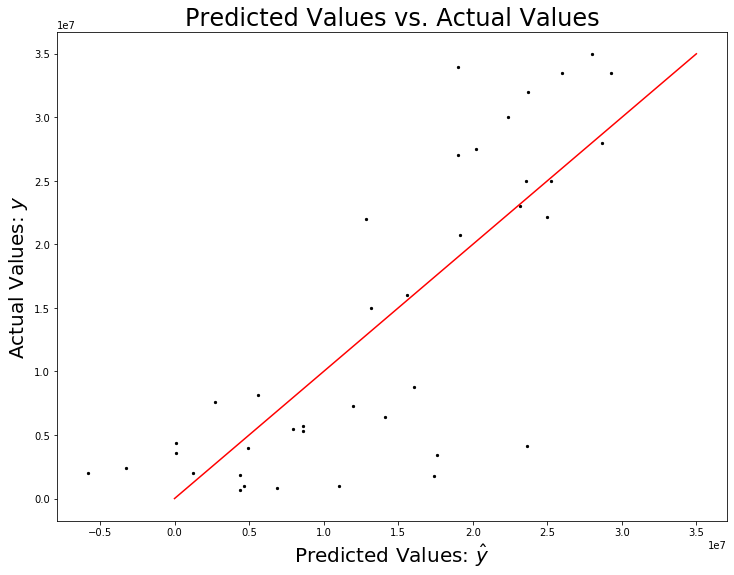

In [14]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [15]:
r2_score(y, y_pred)

0.639929793478307